# Credit Card Fraud Detection
Author: Brenda De Leon

Modeling: #### 
#### Libraries

In [56]:
# importing libraries
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
plt.style.use('ggplot')

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error, plot_confusion_matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, plot_roc_curve, confusion_matrix, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, auc, PrecisionRecallDisplay, average_precision_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
import warnings
warnings.filterwarnings("ignore")

In [22]:
# importing data
# importing dataset
df = pd.read_csv('data/creditcard.csv')
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Evaluation Function

In [58]:
# defining an evaluation classification function for automation and evaluating subsequent models
def evaluate_classification(model, X_train, X_test, y_train, y_test, classes=None, 
                            normalize='true', cmap='cividis', label=''):
    
    """Input a model, training data and test data to return sklearn metrics
        - Classification Report for training and test 
        - PR AUC Score for training and test 
        - Confusion Matrix for training and test 
        - ROC Curve for training and test
        - PR Curve for training and test
        
        Args:
        model: instantiated classifier (ex: LogisticRegression = log_reg)
        X_train: train_test_split & preprocessed
        X_test: train_test_split 
        y_train: train_test_split & preprocessed
        y_test: train_test_split 
        label: optional label for type of classifier 
        
        Modified Function, Citation:
        https://github.com/hpatel530/Chicago-Car-Crash-Data/blob/master/Chicage_Car_Crash.ipynb
    """
    # retrieve predictions for train and test data 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # retrieve probabilites for train and test data 
    y_hat_train = model.predict_proba(X_train)
    y_hat_test = model.predict_proba(X_test)
    
    # retrieve probabilities for the positive class
    pos_probs_train = y_hat_train[:, 1]
    pos_probs_test = y_hat_test[:, 1]
    
    # print training classification report 
    header = label + " CLASSIFICATION REPORT TRAINING "
    dashes = "---" * 20
    print(dashes, header, dashes, sep='\n')
    print(classification_report(y_train, y_pred_train, target_names=classes))
    
    # calculate precision-recall area under curve
    # print training ap score
    # ap_score = average_precision_score(y_train, y_pred_train)
    # print('Training Area Under Precision-Recall Curve, measured by Average Precision score: %.3f' % ap_score)
     
    # display training figures 
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
    
    # plot confusion matrix 
    plot_confusion_matrix(model, X_train, y_train, labels=classes,
                         cmap=cmap, ax=axes[0])
    axes[0].set(title='Confusion Matrix Training')
    
    # plot ROC curve 
    plot_roc_curve(model, X_train, y_train, ax=axes[1], name=label)
    roc = axes[1]
    roc.plot([0,1], [0,1], ls=':', label='No Skill')
    roc.grid()
    roc.set_title('Receiving Operator Characteristic Training')
    
    # plot Precision-Recall curve
    PrecisionRecallDisplay.from_estimator(model, X_train, y_train, ax=axes[2], name=label)
    # y axis is Precision
    axes[2].set_ylabel('Precision')
    # x axis is Recall
    axes[2].set_xlabel('Recall')
    axes[2].set_title('Precision-Recall AUC Training')
    plt.show()

    # print testing classification report 
    header_ = label + " CLASSIFICATION REPORT TESTING "
    print(dashes, header_, dashes, sep='\n')
    print(classification_report(y_test, y_pred_test, target_names=classes))
    
    # calculate precision-recall area under curve
    # print testing ap score
    # ap_score = average_precision_score(y_test, y_pred_test)
    # print('Test Area Under Precision-Recall Curve, measured by Average Precision score: %.3f' % ap_score)
    
    # display testing figures 
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    
    # plot confusion matrix 
    plot_confusion_matrix(model, X_test, y_test, labels=classes, 
                          cmap=cmap, ax=axes[0])
    axes[0].set(title='Confusion Matrix Testing')
    
    # plot ROC curve 
    plot_roc_curve(model, X_test, y_test, ax=axes[1], name=label)
    axes[1].plot([0,1], [0,1], ls=':', label='No Skill')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic Test')

    # plot Precision-Recall curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=axes[2], name=label)
    # y axis is Precision
    axes[2].set_ylabel('Precision')
    # x axis is Recall
    axes[2].set_xlabel('Recall')
    axes[2].set_title('Precision-Recall AUC Test')
    plt.legend()
    plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Preprocessing

In [15]:
# categorical mini-pipeline for columntransformer. X, X_train, X_test have no numeric dtypes. 
# will return sparse matrix where each column corresponds to one possible value of one feature, default parameter
subpipe_num = Pipeline(steps=[
    ('robustscaler', RobustScaler())
])


## Column Transformer

Pipelines will include columntransformer ('CT') to take care of preprocessing & adding data back into original dataset

In [52]:
# creating columntransformer as 'CT'
# columntransformer will one hot encode all non np.number dtypes
# remainder data will pass through without transformation, instead of being dropped
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [29])])

## Data Split

In [43]:
# defining x and y for data split
X = df.drop('Class', axis = 1).values
y = df['Class'].values
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ',  y_train[0:10])
print('y_test samples : ',  y_test[0:10])


X_train samples :  [[ 1.43352000e+05  1.95504092e+00 -3.80782711e-01 -3.15012853e-01
   3.30155452e-01 -5.09374248e-01 -8.61974532e-02 -6.27977906e-01
   3.59937221e-02  1.05456030e+00 -3.04413407e-02  6.24995774e-01
   1.69149569e+00  1.25579040e+00 -2.53266461e-01 -3.31694981e-01
   3.07252346e-01 -9.30843692e-01  6.51665792e-01  1.67986640e-01
  -1.25389994e-01  2.38197424e-01  9.68304938e-01  5.32080152e-02
  -2.78601509e-01 -4.49993014e-02 -2.16780337e-01  4.51682478e-02
  -4.71447917e-02  9.99000000e+00]]
X_test samples :  [[ 4.15050000e+04 -1.65265066e+01  8.58497180e+00 -1.86498532e+01
   9.50559352e+00 -1.37938185e+01 -2.83240430e+00 -1.67016943e+01
   7.51734390e+00 -8.50705864e+00 -1.41101844e+01  5.29923635e+00
  -1.08340065e+01  1.67112025e+00 -9.37385858e+00  3.60805642e-01
  -9.89924654e+00 -1.92362924e+01 -8.39855199e+00  3.10173537e+00
  -1.51492344e+00  1.19073869e+00 -1.12767001e+00 -2.35857877e+00
   6.73461329e-01 -1.41369967e+00 -4.62762361e-01 -2.01857525e+00
  -

## Modeling

In [44]:
# dummy classifier

In [53]:


# pipeline will preprocess data and instantiate estimator
dummy_model_pipe = Pipeline(steps=[
    ('ct', CT),
    ('dum', DummyClassifier(strategy='most_frequent'))
])



In [54]:


# fit pipeline to training data
dummy_model_pipe.fit(X_train, y_train)



Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  [29])])),
                ('dum', DummyClassifier(strategy='most_frequent'))])

------------------------------------------------------------
Dummy Model CLASSIFICATION REPORT TRAINING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845



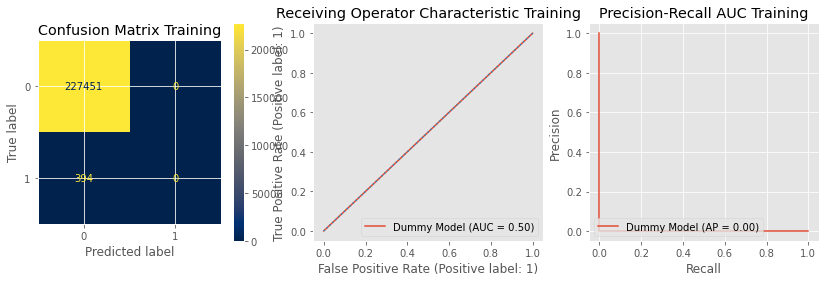

------------------------------------------------------------
Dummy Model CLASSIFICATION REPORT TESTING 
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



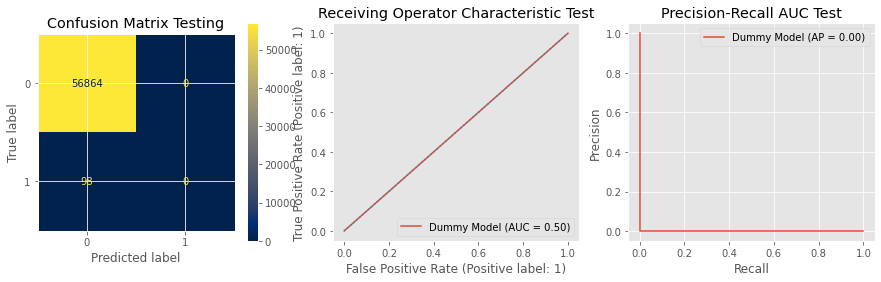

In [59]:
# classification report using function 
evaluate_classification(dummy_model_pipe,
                        X_train, 
                        X_test, 
                        y_train, 
                        y_test, 
                        label='Dummy Model')


Robust Scaling v standard scaler 

next step?

oversampling, undersampling smote, scaling, or removing outliers, or weighing? best method to deal with severe imbalance (and why)

m